#기초통계와 회귀분석(1부)

피어슨 상관계수
--

두 변수 간 선형관계 측정

> +1 : 완벽한 양의 상관 관계

> 0: 선형 상관관계 없음

> -1: 완벽한 음의 선형 상관관계

$$ \gamma_{XY} = \frac{\frac{\sum_{i}^n (X_i - \bar X)(Y_i - \bar Y)}{n-1}}{\sqrt{\sum_i^n \frac{\sum_i^n (X_i - \bar X)^2}{n-1}}\sqrt{\frac{\sum_i^n (Y_i - \bar Y)^2}{n-1}}} $$

이는 곧,

$$ \gamma_{XY} = \frac{\sum_{i}^n (X_i - \bar X)(Y_i - \bar Y)}{\sqrt{\sum_i^n (X_i - \bar X)^2} \sqrt{\sum_i^n (Y_i - \bar Y)^2}} $$

>**IN STATA**
(예시로, 학생들에 대해 과목 성적이 있다고 할 경우) 
- pwcorr 변수1 변수2 변수3: 결측치가 있으면 그 과목만 제외하고 상관분석 (해당 데이터를 제외한다)
- corr 변수1 변수2 변수3: 결측치가 있으면 해당 학생의 모든 성적을 상관분석에서 제외(결측치가 있는 행을 제외한다.)
- pwcorr 변수1 변수2 변수3, sig: sig 옵션을 이용하여 p값을 표시
- pwcorr 변수1 변수2 변수3, sig listwise: listwise 옵션은 4개 변수에서 결측치가 하나도 없는 개체만을 이용하여 상관계수 계산 후 가설검정(즉, corr 이용한 가설검정)



스피어만 상관계수
--

변수가 구간형 데이터가 아니고 순서형 데이터인 경우 상관관계 측정

- 피어슨 상관 계수와는 달리 선형적인 상관 관계를 나타내지 않고 단순히 한 변수가 증가할 때 다른 변수가 증가하는지 감소하는지에 대한 관계만을 나타내는 비모수적 상관계수입니다.

- 출처: https://m.blog.naver.com/istech7/50153047118

>**IN STATA** (피어슨 상관계수 vs 스피어만 상관 계수)

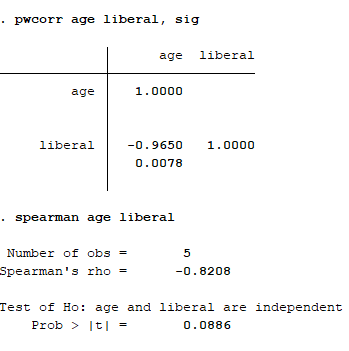

#선형회귀분석 기초

단순선형회귀모형
--

>**IN STATA** 

- reg 종속변수 독립변수

- di 1-(e(rss)/(e(rss)+e(mss))) 결과를 활용하여 $R^2$를 직접 확인

- corr 변수 income


다중선형회귀모형
--

> **IN STATA** 

- reg 종속변수, 독립변수1, 독립변수2

- reg 종속변수, 독립변수1, 독립변수2, beta: 표준화된 추정계수를 얻기 위해

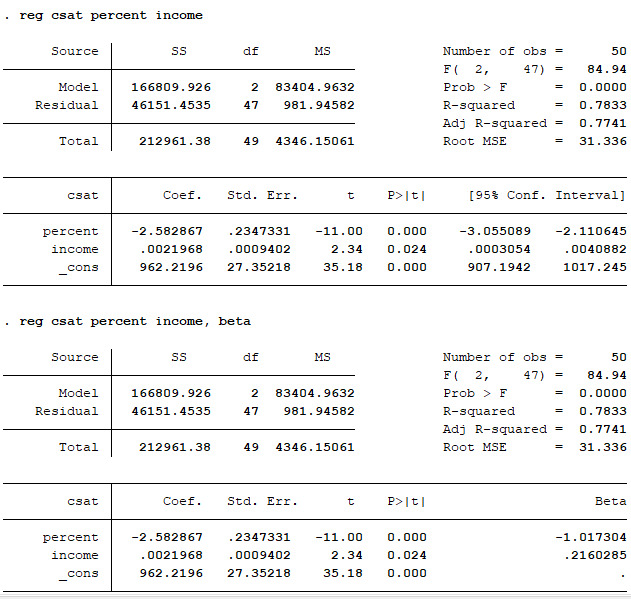



- predict yhat: 적합값 생성

- predict ehat, resid: 잔차 생성





추정계수의 유의성 검정
--

**독립변수 1의 계수가 0인지 F검정통계량으로 검정($t^2 = F$)**

제약식(restrict): 종속변수 = $\beta_0$ + $\beta_2$ 독립변수 2 + $\beta_3$ 독립변수3 + $\beta_4$ 독립변수4 + $e$

$\rightarrow$ 모든 독립변수를 포함하지 않음

비제약식(unrestrict): $\beta_0$ + $\beta_1$ 독립변수 1 + $\beta_2$ 독립변수2 + $\beta_3$ 독립변수 3 + $\beta_4$ 독립변수 4 + $e$

$\rightarrow$ 모든 독립변수를 포함한다.

$\Rightarrow$ 이 모형들을 각각 추정한 후 다음과 같이 F검정통계량 계산

$$ F=\frac{\frac{RSSE-USSE}{J}}{\frac{USSE}{(n-k-1)}} ~ F(J, n-k-1) $$



여기서 RSSE는 제약식의 설명되지 않은 변동(SSE), USSE는 비제약식의 SSE, J는 귀무가설에서 설정한 제약의 개수, n은 관측치수, n은 관측치수, k는 비제약식의 변수개수

>**IN STATA**
- test 독립변수1 = 1 $\Rightarrow$ 독립변수1의 계수가 1인지 F검정
- test 독립변수1 + 독립변수2 = 1 $\Rightarrow$  $\beta_1+\beta_2=1$인지 F검정
- test (독립변수1 + 독립변수2 = 1)(독립변수3=0) $\Rightarrow$ $H0: \beta_1 + \beta_2 = 1, \beta_3=0$를 F검정
- test 독립변수1 독립변수2 독립변수3 독립변수4 $\Rightarrow$ $H0: \beta_1 = \beta_2 = \beta_3 = \beta_4 =0$를 F 검정

더미변수 만들기
--

**더미변수 만들기**

> **IN STATA**
- tab 변수 $\Rightarrow$ 범주별로 빈도를 보여라
- ta 변수, gen(변수) $\Rightarrow$ n개의 더미변수 생성
- tab 변수, prefix(dum) $\Rightarrow$ 변수 값이 2이상인 경우에 1의 값을 갖는 더미변수 생성
- xi I.변수, prefix(dum), noomit $\Rightarrow$ 변수 값이 2이상인 경우에 1의 값을 갖는 더미변수 생성, noomit은 빠뜨리지말라는 뜻

**상호작용변수(Interaction variable) 만들기 (더미$\times$더미)**

> **IN STATA**
- db xi
- I.varname1*I.varname2 선택 $\Rightarrow$ 변수1과 변수2 선택 $\Rightarrow$ Prefix에 dum 입력 $\Rightarrow$ 범주형 변수 간 상호작용변수(변수1$\times$변수2) 생성
- I.varname1*I.varname3 선택 $\Rightarrow$ 변수1과 변수3 선택 $\Rightarrow$ Prefix에 dum 입력 $\Rightarrow$ 범주형 변수와 연속형 변수 간 상호작용변수(변수1$\times$변수3) 생성

더미변수 회귀모형의 추정 및 해석
--

ex) 두 개의 더미변수(D2: 흑인-1, D3: 기타-1)와 연속형 변수(x1: 직장 총 근무연한)를 설명 변수로 하는 회귀모형

$$ y=\beta_0 x1 + \beta_2 D2 + \beta_3 D3 + e $$

흑인인 경우, $ E(y)= \beta_0 + \beta_1 x_1 + \beta_2$

기타인 경우, $ E(y)= \beta_0 + \beta_1 x_1 + \beta_3$

백인인 경우, $ E(y)= \beta_0 + \beta_1 x_1 $

> **IN STATA**
- char 변수 [omit] 2 $\Rightarrow$ 더미변수 생성에 흑인(D2)를 제외하라.
- xi: reg ln_wage I.race ttl_exp $\Rightarrow$ D1(백인 더미변수), D3(기타 더미변수)를 생성한 후, 회귀분석 수행(설명변수: ln_wage, 독립변수: 두 개의 더미변수, ttl_exp)
- 두 개의 더미변수(D1:백인-1, D3:기타-1), 연속형 변수(x1: 직장 총 근무연한), 두 개의 상호작용변수(D1 * x1, D3 * x1)를 설명변수로 하는 모형
- $ y= \beta_0 + \beta_1 D1 + \beta_2 D3 + \beta_3 x1 + \beta_4 D1x1 +\beta_5 D3x1 +e$
- 위의 식은 기울기와 상수항에 변화를 주는 모형임

> **IN STATA**
- reg ln_wage dumrace_2 dumrace_3 ttl_exp
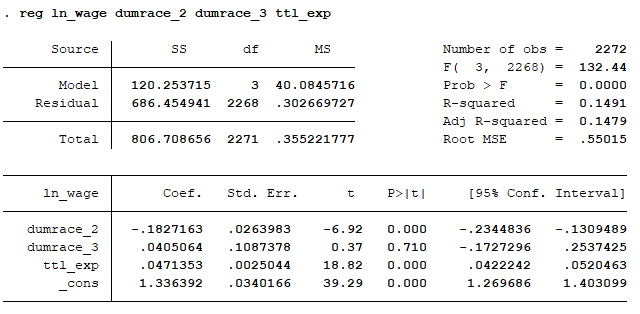
- xi: reg ln_wage I.race ttl_exp
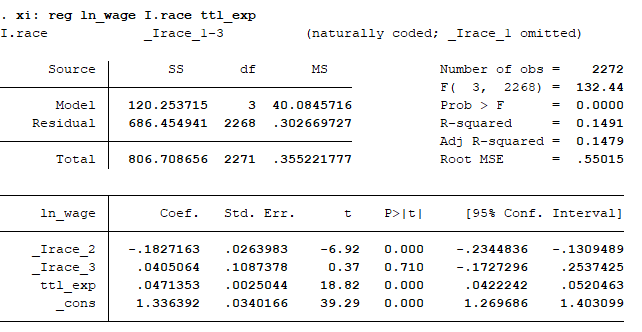


백인인 경우: $E(y)=\beta_0 +\beta_1 + (\beta_3 + \beta_4) x1 $

기타인 경우: $E(y)=\beta_0 +\beta_2 + (\beta_3 + \beta_5) x1 $

흑인인 경우: $E(y)=\beta_0 + \beta_3x_1 $

>**IN STATA**
- xi: reg ln_wage I.race*ttl_exp
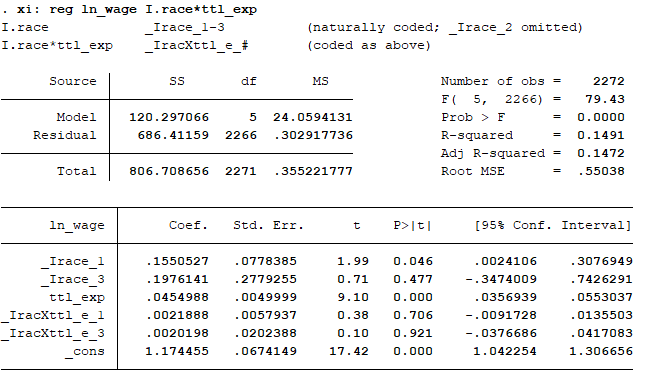

연속형 변수(x1: 직장 총 근무연한)와 두 개의 상호작용변수(D1 * x1, D3 * x1)를 설명변수로 하는 회귀모형 (두 개의 더미변수는 제외)

$y=\beta_0 + \beta_3x1 + \beta_4D1x1 + \beta_5D3x1 + e$

백인인 경우: $E(y)=\beta_0 +(\beta_3 + \beta_4) x1 $

기타인 경우: $E(y)=\beta_0 + (\beta_3 + \beta_5) x1 $

흑인인 경우: $E(y)=\beta_0 + \beta_3x_1 $

>**IN STATA**
- xi: reg ln_wage I.race|ttl_exp
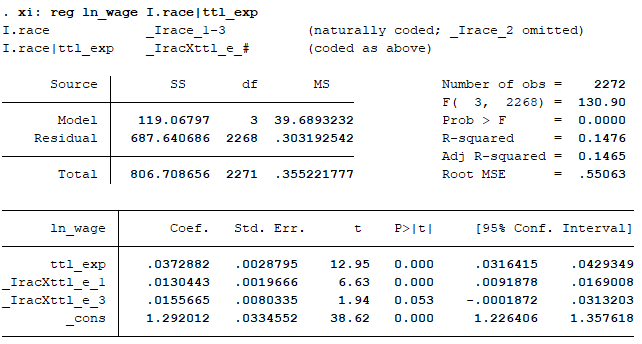

OLS(최소자승법): 잔차의 제곱의 합을 최소화되게끔 만들어서 계수를 고르게 하는 방법

BLUE(최우수선형불편추정량): 최소제곱추정량이 불편추정량이며 최소분산을 가지는 불편추정량

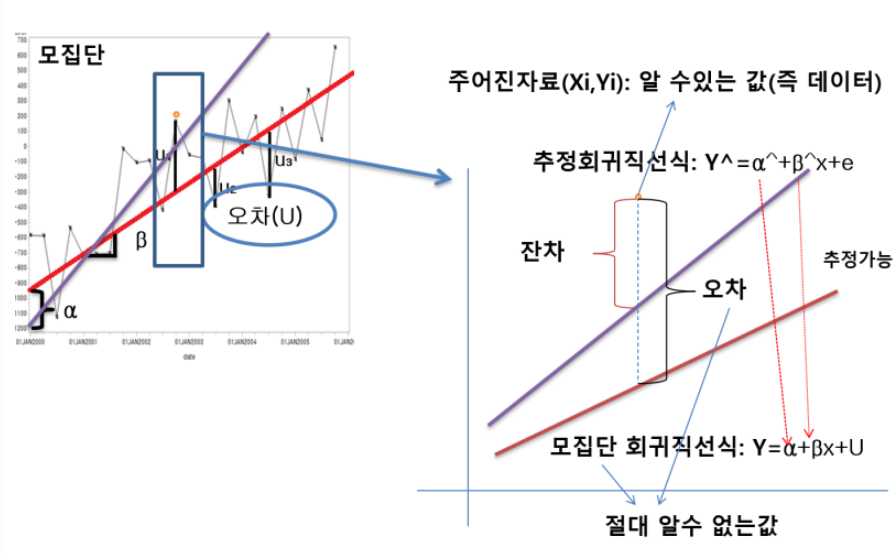

- 사진 출처: https://m.blog.naver.com/gustncjstk1/222053636591

**다음 조건들이 만족되면 OLS 추정치가 BLUE(Best Linear Unbiased Estimator)**
--

- **(가정1) 실제모형이 추정모형과 마찬가지로 선형이다.**
- **(가정2) 오차항의 조건부 기댓값 $E(e_i|x_i)=0$이다. 이는 $cov(x_i, e_i)=0$을 의미한다.**
- **(가정3) 오차항의 조건부 분산 $var(e_i|x_i)$은 모든 $i$에 대해 동일하다.(동분산성).즉, $var(e_i|x_i)=\sigma^2 이다.$**
- **(가정4) 두 개의 서로 다른 오차항 $e_i$와 $e_j$는 서로 독립니다. 즉, $cov(e_i, e_j)=0$이다.**
- **(가정5) 오차항 $e_i$는 정규분포를 따른다. 즉, $e_i|x_i ~ N(0, \sigma^2)$이다.**
- **(가정6) (상수항을 포함하여) 설명변수들 간에 완전한 선형관계가 없어야 한다.** 



**주의**
더미변수, $D1+D2+D3=1$일 때,

$ y= \beta_0 + \beta_1 D1 + \beta_2 D2 + \beta_3 D3 + beta_4 x1 + e$는 (가정 6)에 위배된다. 그러나 상수항을 제외하면 가능하다.

>**IN STATA**
- **(모형 1) vs (모형 2)**
- (모형 1) 더미변수 모두 포함, 상수항 제거
- xi, noomit: reg ln_wage I.race ttl_exp, nocons
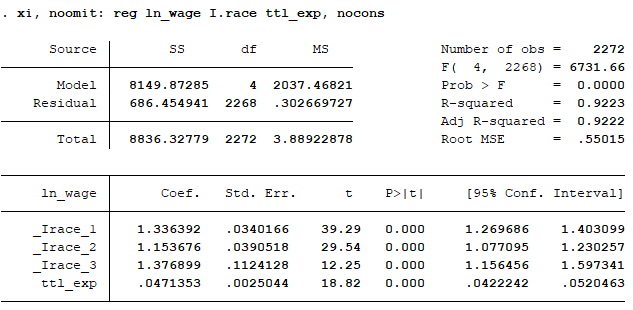
- nocons는 상수항을 빼라는 의미
- (모형 2) 더미변수 하나 제외, 상수항 포함
- xi: reg ln_wage I.race ttl_exp
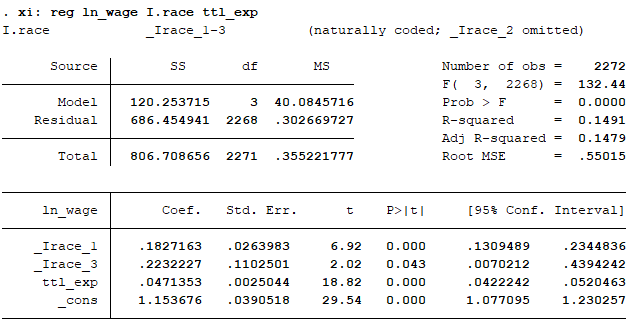




다중공선성(multicollinearity) 문제 검정(가정 6)
--

- (가정6) (상수항을 포함하여) 설명변수들 간에 완전한 선형관계가 없어야 한다. 

$$ VIF = \frac{1}{1-R^2} $$

- VIF는 상관관계가 높은 변수로 인해 추정계수의 표준오차가 커지는 정도 측정한다. VIF가 10보다 크면 ($\frac{1}{VIF}$가 0.1보다 작으면) 다중공선성 문제 의심한다. 또한 각 변수들의 VIF가 모두 10보다 작더라도 평균(Mean VIF)가 1보다 상당히 크면 역시 다중공선성 의심된다.

이분산성 탐지 (가정 3 검정)
--

- (가정3) 오차항의 조건부 분산 $var(e_i|x_i)$은 모든 $i$에 대해 동일하다.(동분산성). 즉, $var(e_i|x_i)=\sigma^2 이다.$

**검정통계량을 이용한 검정: Breush-Pagan 검정**

Breush-Pagan 검정 배경

설명 변수의 값이 증가함에 따라 잔차의 변동성도 증가 할 때, 잔차의 제곱값 $e_i^2$을 반응 변수로 두고 설명변수는 그대로 $x_i$로 하여 선형 모형을 적합하는 할 때, 식은 다음과 같다.

$$ e_i^2 = \gamma_0 + \gamma_1 x_i, i=1,2,\cdots, n$$

여기서 귀무가설 $H_0: \gamma_1=0$을 테스트하여 기각할 수 있다면 이는 오차의 분산이 설명 변수에 따라 증가 또는 감소한다고 말할 수 있고 이는 오차의 등분산성에 위배된다고 할 수 있습니다.

출처: https://zephyrus1111.tistory.com/57

Breusch-Pagan 검정 가정사항

1. 샘플 수가 많아야 할 것

2. 오차항은 독립이고 정규분포를 따라야 할 것

3. 오차의 분산은 설명 변수와 연관이 있어야 할 것

$SSR^* = \sum_{i=1}^n (\hat{\gamma_0} + \hat{\gamma_1}x_i - \bar e_i^2)^2$

$SSE=\sum_{i=1}^n e_i^2$

일 때, Breusch-Pagan 검정 통계량 $\chi^2_{BF}$

$\chi^2_{BF}=\frac{SSR^*}{2} \div (\frac{SSE}{n})^2 $

샘플의 개수가 충분(보통 20개 이상)하고 귀무가설 $H_0=\gamma_1=0$이 참일 때, $\chi^2_{BF}$은 근사적으로 자유도가 1인 카이제곱 분포를 따름. $\chi^2_{BF}$ 값이 유의미하게 크다면 귀무가설을 기각하게 되고 이는 오차의 등분산성 가정이 위배된다고 볼 수 있음.

> **IN STATA**

- estat hettest

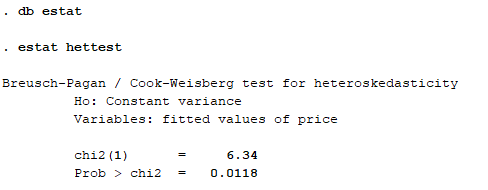

- estat hettest weight

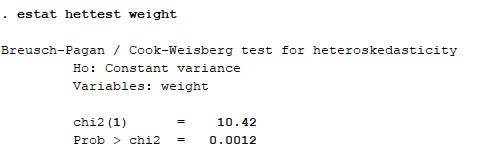


> **파이썬으로 해보기**

- 코드 출처: https://zephyrus1111.tistory.com/57

In [35]:
from google.colab import files
files.upload()

In [28]:
import pandas as pd
import numpy as np
 
from scipy.stats import chi2
from statsmodels.formula.api import ols
 
df = pd.read_csv('toluca_company_dataset.csv')

In [30]:
fit = ols('Work_hours ~ Lot_size',data=df).fit() ## 단순선형회귀모형 적합
 
sse = sum(np.square(fit.resid)) ## 잔차 제곱합
res_square = np.square(fit.resid) ## 잔차 제곱
 
## 잔차 제곱과 Lot_size사이의 회귀적합을 위한 데이터프래임 생성
df_res = pd.DataFrame()
df_res['Lot_size'] = df['Lot_size']
df_res['Res_square'] = res_square
 
fit_res = ols('Res_square ~ Lot_size',data=df_res).fit() ## 잔차 제곱과 Lot_size 단순선형회귀모형 적합
 
mean_rs = np.mean(res_square) ## 잔차 제곱의 평균
fitted_val = fit_res.params.Intercept + fit_res.params.Lot_size * df_res['Lot_size']
ssr_star = sum(np.square(fitted_val-mean_rs)) ## 회귀제곱합
 
## 검정통계량
num = ssr_star/2
denom = np.square(sse/len(df))
 
chi_bp = num/denom ## 검정통계량

In [31]:
print(chi_bp)

0.8209192010359909


In [33]:
## 기각역
alpha = 0.05 ## 유의수준
critical_value = chi2.ppf(1-alpha,1) ## 기각값
print(critical_value)

3.841458820694124


In [34]:
if chi_bp<critical_value:
  print("H0 채택")
else:
  print("H1 채택")

H0 채택


- 귀무가설 $H_0$를 채택함으로써, 설명변수가 증가함에 다라 오차의 분산이 증가한다고 할 수 없음. 즉, 이는 오차의 등분산성 가정을 위배하지 않는다고 결론 내릴 수 있음

**추가: Brown-Forsythe 검정**

Brown-Forsythe 검정배경

- Breusch-Pagan 검정의 경우 오차의 분포가 정규분포가 아니면 사용하기 어려움. Brown-Forsythe 검정은 설명 변수를 기준으로 데이터를 두 개의 그룹으로 나누고 각 그룹별로 잔차 편차(잔차-그룹별 잔차 중앙값)의 평균을 구하는데, 이 때, 그룹별로 평균의 차이가 없다면 이는 설명 변수에 따라 오차의 분산이 변하지 않는다고 할 수 있음.

Brown-Forsythe 검정방법

1. 선형 모형을 적합한다.
2. 적합한 선형 모형을 이용하여 잔차를 구함.
3. 적합에 사용한 설명 변수를 이용하여 잔차를 두 그룹으로 나눈다.
4. 각 그룹에서 잔차의 중간값을 구하고 잔차와 중간값 차이의 평균을 구한다.
5. 두 그룹에서 계산한 차이를 이용하여 이 표본(Two sample) t테스트 수행한다.

$ E(y_i) = \beta_0 + \beta_1 x_i, i=1,2, \cdots, n$

$e_i = y_i - \hat{y_i}$

첫 번째 그룹의 잔차 $\rightarrow$ $e_{i1}, (i=1, \cdots, n1)$

두 번째 그룹의 잔차 $\rightarrow$ $e_{i2}, (i=1, \cdots, n2)$

$ d_{i1} = |e_{i1} - \widetilde{e}_1|, d_{i2} = |e_{i2} - \widetilde{e}_2| $

$ \bar{d}_j = \frac{1}{n_j} \sum_{i=1}^{n_j} d_{ij}, j=1,2 $

검정통계량 $t_{BF}$

$ t_{BF} = \frac{\bar{d}_1 - \bar{d}_2 }{s \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} $

$ s^2= \frac{\sum({d_{i1}-\bar{d}_1})^2+\sum({d_{i2}-\bar{d}_2})^2}{n-2}$

> **파이썬으로 해보기**

- 코드 출처: https://zephyrus1111.tistory.com/57

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import t
from statsmodels.formula.api import ols

df=pd.read_csv("toluca_company_dataset.csv")

In [37]:
df.head()

,Lot_size,Work_hours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


In [38]:
fit=ols("Work_hours~Lot_size", data=df).fit()

In [39]:
fit = ols('Work_hours ~ Lot_size',data=df).fit() ## 단순선형회귀모형 적합
 
## 그룹별 잔차를 구한다.
 
def get_median(x):
    ## 중간값을 계산하는 함수
    x = sorted(x)
    mid_index = len(x)//2
    return (x[mid_index]+x[~mid_index])/2
 
median_lot_size = get_median(df['Lot_size']) ## Lot_size의 중앙값
 
g1 = [i for i in df['Lot_size'].index if df['Lot_size'][i] <= median_lot_size] ## 중간값이하의 데이터는 그룹 1로 한다.
g2 = [i for i in df['Lot_size'].index if df['Lot_size'][i] > median_lot_size] ## 중간값을 초과하는 데이터는 값은 그룹 2로한다.
 
e1 = [] ## 그룹 1의 잔차
e2 = [] ## 그룹 2의 잔차
for i in df['Lot_size'].index:
    fitted_value = fit.params.Intercept + fit.params.Lot_size*df['Lot_size'][i] ## 해당 Lot_size에 대한 Work_hours의 추정값
    resid = df['Work_hours'][i] - fitted_value ## 잔차
    if i in g1:
        e1.append(resid)
    else:
        e2.append(resid)
        
median_e1 = get_median(e1) ## 그룹 1 잔차 중앙값
median_e2 = get_median(e2) ## 그룹 2 잔차 중앙값
 
d1 = [] ## 그룹 1 잔차와 잔차 중앙값의 차이
d2 = [] ## 그룹 2 잔차와 잔차 중앙값의 차이
for e in e1:
    d1.append(abs(e-median_e1))
for e in e2:
    d2.append(abs(e-median_e2))
 
## 검정통계량 계산
pooled_var_num = sum([(x-np.mean(d1))**2 for x in d1]) + sum([(x-np.mean(d2))**2 for x in d2])
pooled_var_denom = len(df)-2 ## 자유도
pooled_var = pooled_var_num/pooled_var_denom ## pooled variance
s = np.sqrt(pooled_var) ## standard deviation of pooled variance
 
t_bf = (np.mean(d1)-np.mean(d2))/(s*np.sqrt(1/len(d1)+1/len(d2))) ## 검정 통계량

In [40]:
abs(t_bf)

1.3164817609565638

In [41]:
## 기각역
alpha = 0.05 ## 유의수준
critical_value = t.ppf(1-alpha/2,len(df)-2) 
print(critical_value)

2.0686576104190406


In [43]:
if t_bf<critical_value:
  print("H0 채택")
else:
  print("H1 채택")

H0 채택


- 귀무가설 $H_0$를 채택함으로써, 설명변수가 증가함에 다라 오차의 분산이 증가한다고 할 수 없음. 즉, 이는 오차의 등분산성 가정을 위배하지 않는다고 결론 내릴 수 있음

**검정통계량을 이용한 검정: White 검정**


오차항의 추정치를 이용하여 보조회귀식을 세울 수 있는데, 보조회귀식은 오차항의 추정치에 나타나는 변수들을 이용하여 설명변수, 설명변수의 제곱, 두 설명변수의 곱으로 나타낼 수 있다.

귀무가설이 채택되면 이분산이 존재하지 않고, 귀무가설이 기각되면 이분산이 존재한다.

- 출처: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=jahyone20&logNo=220928943873

> **IN STATA**

- estat imtest, white

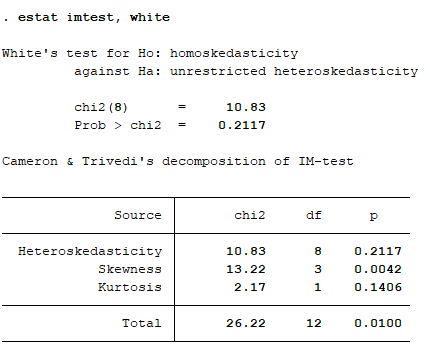


이분산성 고려한 추정
--

**1. robust standard error를 사용**

OLS 방법으로 추정하되, 왜곡이 발생하는 추정계수 표준오차에 수정을 가해 보다 적절한 값을 갖도록 하는 방안



> **IN STATA**
- reg price lotsize sqrft bdrms

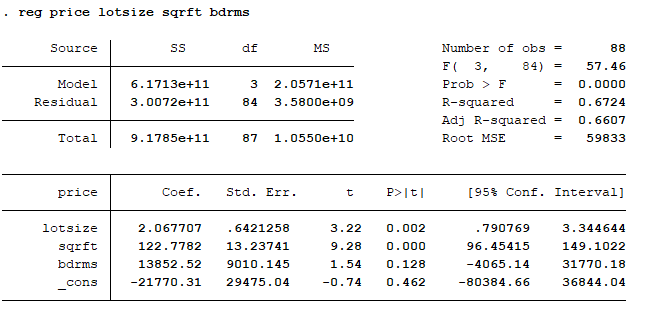

- reg price lotsize sqrft bdrms, **vce(robust)**

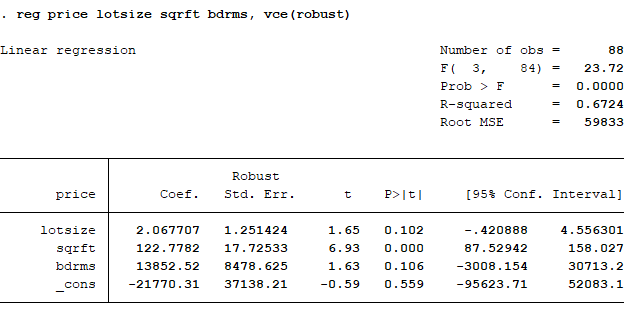

** 2. GLS(Generalized Leat Squares) 추정**

회귀모형 양변을 $\sqrt{변수}$로 나누어 식을 변형 시킨 후 추정

 (**주의: 전제한 이분산성 유형이 올바르다는 가정 하에 적용**)

> **IN STATA**
- reg price lotsize sqrft bdrms [aweight=1/lotsize]

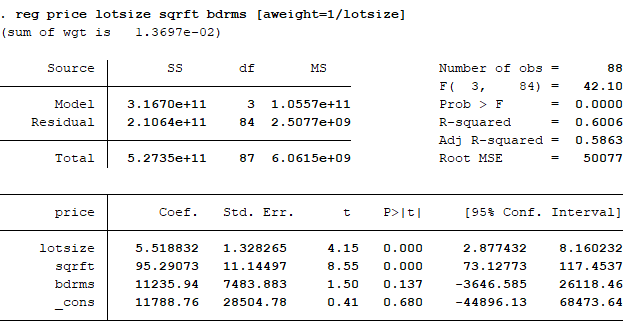
